<a href="https://colab.research.google.com/github/qbgbduenas-ship-it/CPE-018-CPE31S2/blob/main/DUENAS_of_Activity_5_Line_and_Circle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
2ND Semester | AY 2025-2026
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Duenas, Beatrice Gillianne B.
**Section** | CPE31S2
**Date Performed**: | 01/20/2026
**Date Submitted**: |01/20/2026
**Instructor**: | Engr. Sayo

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

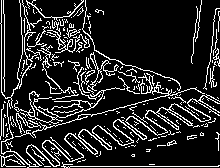

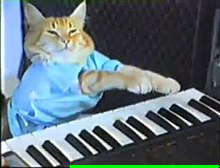

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

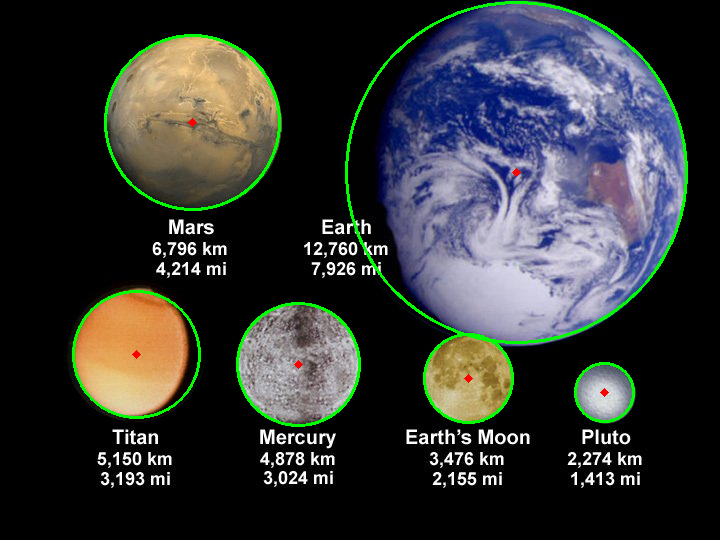

-1

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


What happens to the code once you run **and the value of n is 5**?

- When the code has a value of (n = 5). The line and circle detection are perfectly fitted to the image that was aim to highlight.

Change the value to 9, **what happens to the image**?

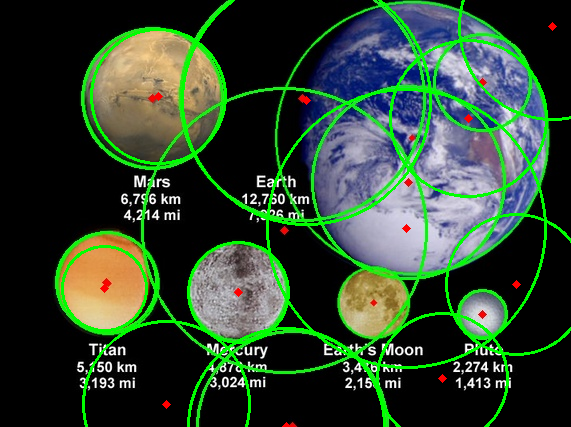

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/drive/MyDrive/2026 SEMESTER/EMTECH/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/2026 SEMESTER/EMTECH/planets.jpg", planets)
cv2_imshow(planets)

- Comparing to the value of 5 and 9. The value of 5 was perfectly arrange, more visualizing, and we can easily identify the highlighted object. On the other hand, the value of (n=9) have become disorganize and cannot have an exact highlighted on image.

Lastly, change the value to 15, **what can you say about the resulting image?**

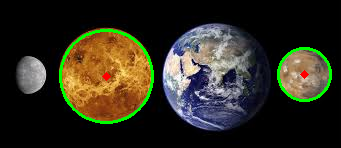

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/2026 SEMESTER/EMTECH/planets3.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/2026 SEMESTER/EMTECH/planets3.jpg", planets)
cv2_imshow(planets)

Comparing to other values, the value of (n=9) have become lesser. The highlighted circle become more neater and lesser highlighted circle. As you can see some planets do not have any circle and lines as this shape do not have fully formed "CIRCLE". Therefore, highlighting images can make a big impact in focusing on what important part of the image have.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

I believe that having the line and circle detection helps in different ways as this aims in drawing immediate attention  signifies unity, and enhances memory retention of specific information. By this we can easily identify the organizes information for efficient review, and makes learning a more active, engaging process.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

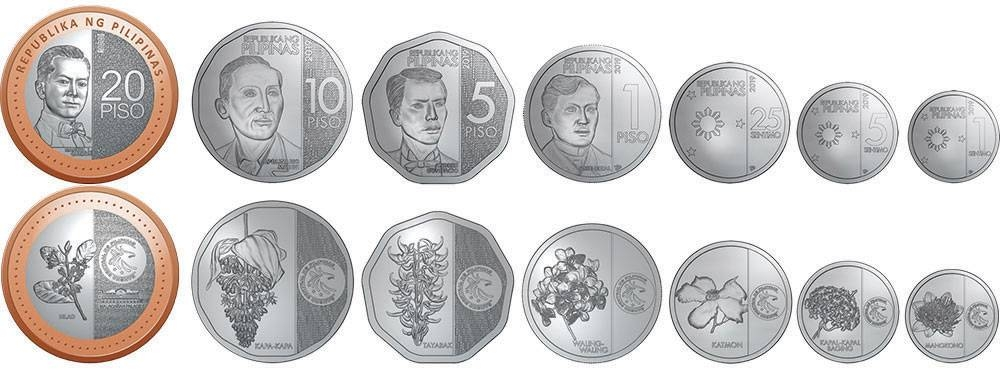

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?

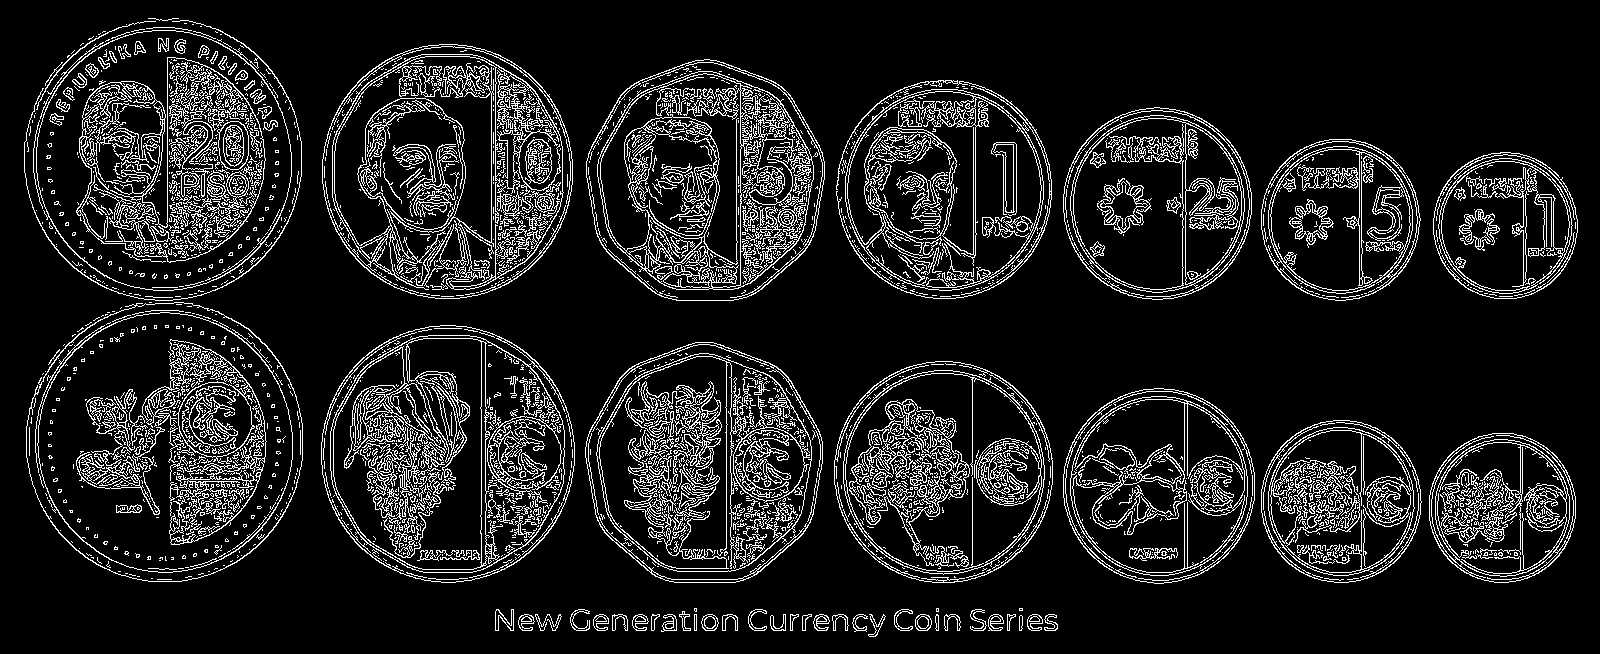

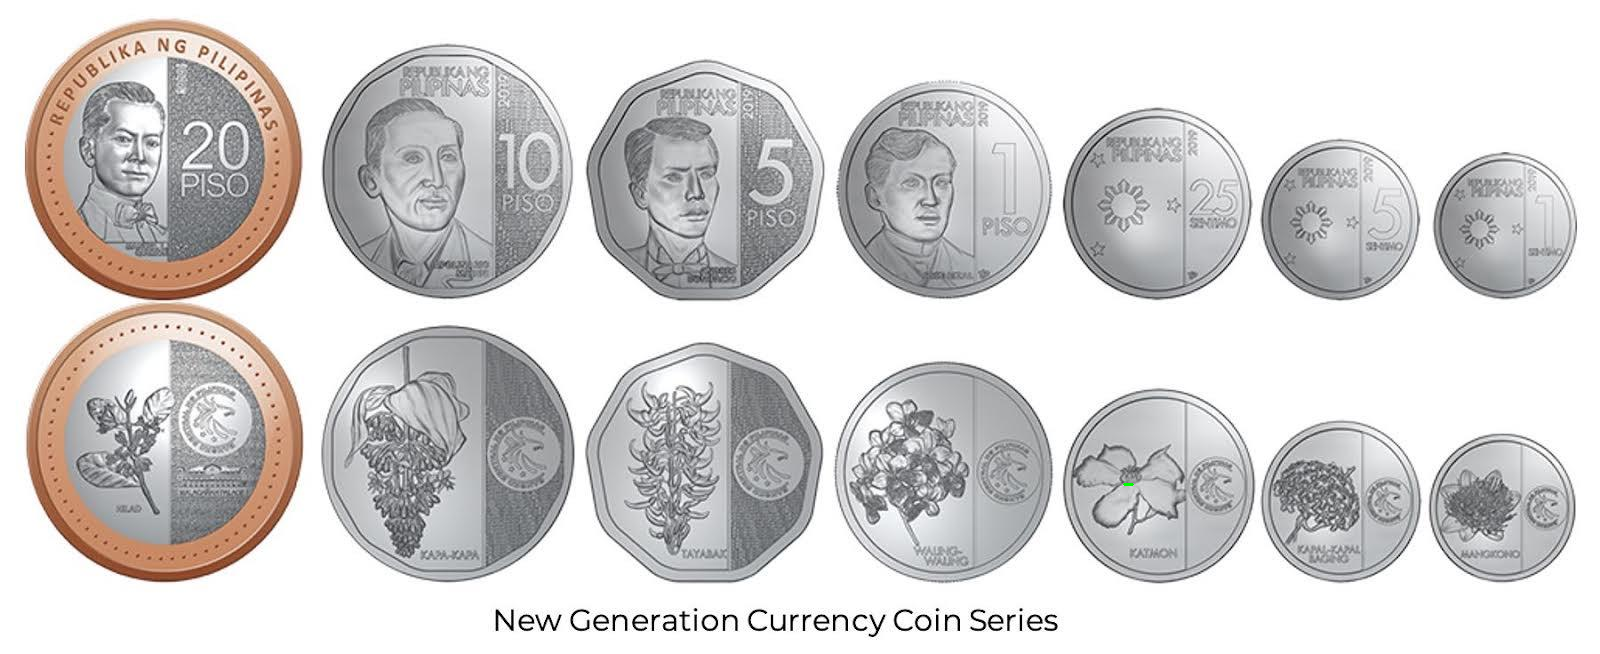

654


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/2026 SEMESTER/EMTECH/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)
print(len(edges))

- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

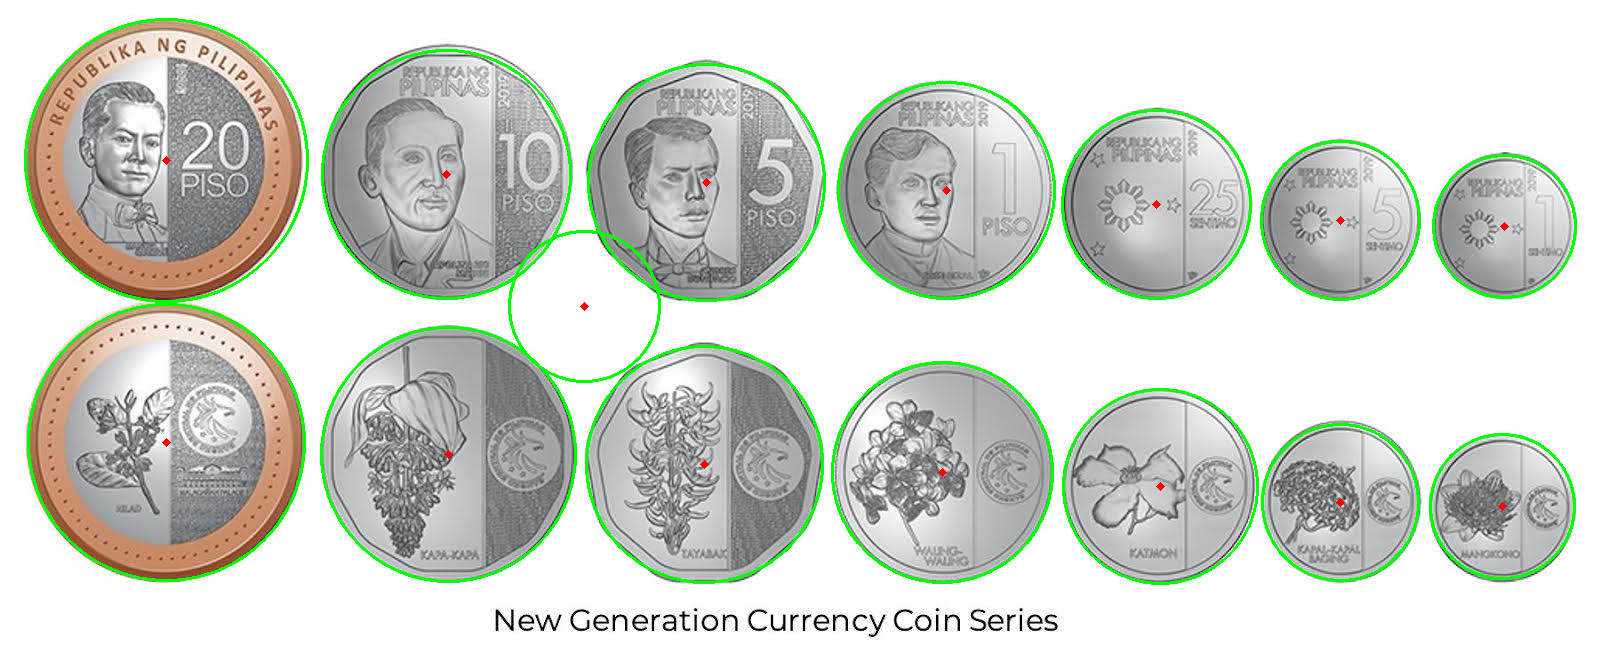

654


In [ ]:
import cv2
import numpy as np

n = 47

planets = cv2.imread('/content/drive/MyDrive/2026 SEMESTER/EMTECH/coins.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/2026 SEMESTER/EMTECH/coins.jpg", planets)
cv2_imshow(planets)
print(len(edges))

As we see, all coins have been highlighted through the circle detection.

## 5. Summary, Conclusions and Lessons Learned

This activity 5 (line and circle detection) was discussed in this hands-on activity and by these I have learned different codes in conducting the line detection. I have learned that when we change the value of n it also change on how we highlight the circle of an image. The value of n refers to the numer of parameters required to define an ellipse or the minimum number of points needed for certain algorithm. As we have observed in the procedure, as much as we change the value of n, the more it changes the position and number of the highlighted object.

In this activity, it allows students to understand more the effectiveness, importance, and how detection affects the highlighted in the image. I have learned that detecting any type of object in images is essential as this allows the user and computer to vision and to process the image, which is critical for converting raw pixel data into meaningful geometric information. I believe that we can use this in our future innovation and research which enables machines to recognize, analyze. amd measure structures within imaes.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*